In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/MENKEU PURBAYA.xlsx'
df = pd.read_excel(file_path)

df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1970994582113619968,Wed Sep 24 23:31:42 +0000 2025,6,Menteri Keuangan mulai mendapat simpati.,1970994582113619968,NaN,NaN,in,NaN,0,1,1,https://x.com/undefined/status/197099458211362...,1719885887662870016,NaN
1,1970880909084699904,Wed Sep 24 16:00:00 +0000 2025,1,Menteri Keuangan Purbaya Yudhi Sadewa melapork...,1970880909084699904,https://pbs.twimg.com/amplify_video_thumb/1970...,NaN,in,NaN,1,0,0,https://x.com/undefined/status/197088090908470...,135795460,NaN
2,1970875874602789888,Wed Sep 24 15:40:00 +0000 2025,0,KETUA Dewan Ekonomi Nasional Indonesia Luhut B...,1970875874602789888,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197087587460279...,68930552,NaN
3,1970865821799820032,Wed Sep 24 15:00:03 +0000 2025,8,Kementerian Keuangan akan mengejar penagihan d...,1970865821799820032,https://pbs.twimg.com/amplify_video_thumb/1970...,NaN,in,NaN,0,2,3,https://x.com/undefined/status/197086582179982...,135795460,NaN
4,1970851828188189952,Wed Sep 24 14:04:27 +0000 2025,1,Menteri Keuangan Purbaya Yudhi Sadewa dikenal ...,1970851828188189952,https://pbs.twimg.com/media/G1nfAscWgAAhC3P.jpg,NaN,in,NaN,0,0,1,https://x.com/undefined/status/197085182818819...,47596019,NaN


In [ ]:
# ambil hanya kolom full_text
df_text = df[['full_text']]

df_text.head()

,full_text
0,Menteri Keuangan mulai mendapat simpati.
1,Menteri Keuangan Purbaya Yudhi Sadewa melapork...
2,KETUA Dewan Ekonomi Nasional Indonesia Luhut B...
3,Kementerian Keuangan akan mengejar penagihan d...
4,Menteri Keuangan Purbaya Yudhi Sadewa dikenal ...


In [ ]:
import re
# Fungsi preprocessing
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # hapus URL
    text = re.sub(r"@\w+|#\w+", '', text)  # hapus mention/hashtag
    text = re.sub(r"[^a-zA-Z\s]", '', text)  # hanya huruf
    return text.strip()

# Terapkan fungsi ke kolom full_text
df_text['cleaned_text'] = df_text['full_text'].apply(clean_text)

df_text.head()

/tmp/ipython-input-3187281600.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['cleaned_text'] = df_text['full_text'].apply(clean_text)


,full_text,cleaned_text
0,Menteri Keuangan mulai mendapat simpati.,menteri keuangan mulai mendapat simpati
1,Menteri Keuangan Purbaya Yudhi Sadewa melapork...,menteri keuangan purbaya yudhi sadewa melapork...
2,KETUA Dewan Ekonomi Nasional Indonesia Luhut B...,ketua dewan ekonomi nasional indonesia luhut b...
3,Kementerian Keuangan akan mengejar penagihan d...,kementerian keuangan akan mengejar penagihan d...
4,Menteri Keuangan Purbaya Yudhi Sadewa dikenal ...,menteri keuangan purbaya yudhi sadewa dikenal ...


In [ ]:
 df['cleaned_text'] = df['full_text'].astype(str).apply(clean_text)

# Load kamus slang
kamus = pd.read_excel('/content/drive/MyDrive/slang-indo.xlsx')

# Bikin dictionary
kamus_dict = dict(zip(kamus['kata'].astype(str).str.lower(), kamus['arti'].astype(str).str.lower()))

# Normalisasi teks
def normalize_text(text):
    words = str(text).split()
    new_words = [kamus_dict.get(w.lower(), w) for w in words]  # case-insensitive
    return " ".join(new_words)

df['normalized_text'] = df['cleaned_text'].apply(normalize_text)

# Pilih hanya 3 kolom
df_final = df[['full_text', 'cleaned_text', 'normalized_text']]

# Simpan ke CSV
df_final.to_csv('/content/drive/MyDrive/fulltext_normalized.csv', index=False)

print("✅ File berhasil disimpan dengan 3 kolom saja.")
df_final.head()



✅ File berhasil disimpan dengan 3 kolom saja.


,full_text,cleaned_text,normalized_text
0,Menteri Keuangan mulai mendapat simpati.,menteri keuangan mulai mendapat simpati,menteri keuangan mulai mendapat simpati
1,Menteri Keuangan Purbaya Yudhi Sadewa melapork...,menteri keuangan purbaya yudhi sadewa melapork...,menteri keuangan purbaya yudhi sadewa melapork...
2,KETUA Dewan Ekonomi Nasional Indonesia Luhut B...,ketua dewan ekonomi nasional indonesia luhut b...,ketua dewan ekonomi nasional indonesia luhut b...
3,Kementerian Keuangan akan mengejar penagihan d...,kementerian keuangan akan mengejar penagihan d...,kementerian keuangan akan mengejar penagihan d...
4,Menteri Keuangan Purbaya Yudhi Sadewa dikenal ...,menteri keuangan purbaya yudhi sadewa dikenal ...,menteri keuangan purbaya yudhi sadewa dikenal ...


extra dick karena ada beberapa singkatan yang tidak ternormalisasi

In [ ]:
extra_dict = {
    "ajg": "anjing",
    "skrg": "sekarang",
    "orgnya": "orangnya",
    "sptnya": "sepertinya",
    "bnr": "bener",
    "bener":"benar"
}

kamus_dict.update(extra_dict)

# Normalisasi teks
def normalize_text(text):
    words = str(text).split()
    new_words = [kamus_dict.get(w.lower(), w) for w in words]
    return " ".join(new_words)

df['normalized_text'] = df['cleaned_text'].apply(normalize_text)

# Pilih hanya 3 kolom
df_final = df[['full_text', 'cleaned_text', 'normalized_text']]

# Simpan ke CSV baru
df_final.to_csv('/content/drive/MyDrive/fulltext_normalized_v2.csv', index=False)

print("✅ File baru disimpan: fulltext_normalized_v2.csv")
df_final.head()

✅ File baru disimpan: fulltext_normalized_v2.csv


,full_text,cleaned_text,normalized_text
0,Menteri Keuangan mulai mendapat simpati.,menteri keuangan mulai mendapat simpati,menteri keuangan mulai mendapat simpati
1,Menteri Keuangan Purbaya Yudhi Sadewa melapork...,menteri keuangan purbaya yudhi sadewa melapork...,menteri keuangan purbaya yudhi sadewa melapork...
2,KETUA Dewan Ekonomi Nasional Indonesia Luhut B...,ketua dewan ekonomi nasional indonesia luhut b...,ketua dewan ekonomi nasional indonesia luhut b...
3,Kementerian Keuangan akan mengejar penagihan d...,kementerian keuangan akan mengejar penagihan d...,kementerian keuangan akan mengejar penagihan d...
4,Menteri Keuangan Purbaya Yudhi Sadewa dikenal ...,menteri keuangan purbaya yudhi sadewa dikenal ...,menteri keuangan purbaya yudhi sadewa dikenal ...


In [ ]:
# Ambil hanya kolom normalized_text
df_norm = df[['normalized_text']]

# Hapus baris kosong atau NaN
df_norm = df_norm.dropna(subset=['normalized_text'])
df_norm = df_norm[df_norm['normalized_text'].str.strip() != ""]

# Simpan ke file baru
df_norm.to_csv('/content/drive/MyDrive/normalized_text_only.csv', index=False)

print("✅ File baru disimpan: normalized_text_only.csv")
df_norm.head()

✅ File baru disimpan: normalized_text_only.csv


,normalized_text
0,menteri keuangan mulai mendapat simpati
1,menteri keuangan purbaya yudhi sadewa melapork...
2,ketua dewan ekonomi nasional indonesia luhut b...
3,kementerian keuangan akan mengejar penagihan d...
4,menteri keuangan purbaya yudhi sadewa dikenal ...


In [ ]:
import pandas as pd

# Misalnya kamu punya dua dataset
data1 = pd.read_csv("/content/drive/MyDrive/purbaya.csv")
data2 = pd.read_csv("/content/drive/MyDrive/menteri_keuangan (1).csv")

# Tambahkan kolom penanda asal
data1["asal_dataset"] = "Dataset 1"
data2["asal_dataset"] = "Dataset 2"

# Gabungkan kedua dataset
gabung = pd.concat([data1, data2], ignore_index=True)

# Hitung jumlah dan persentase kontribusi
distribusi = gabung["asal_dataset"].value_counts(normalize=True) * 100

print("Persentase kontribusi tiap dataset:")
print(distribusi)


Persentase kontribusi tiap dataset:
asal_dataset
Dataset 2    53.26087
Dataset 1    46.73913
Name: proportion, dtype: float64


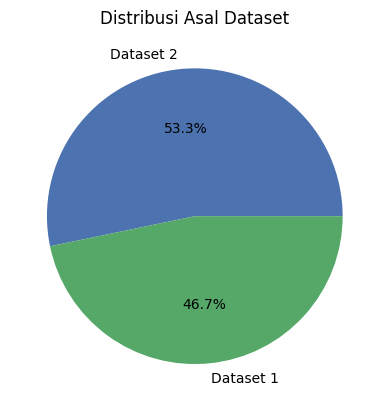

In [ ]:
import matplotlib.pyplot as plt

distribusi.plot(kind='pie', autopct='%1.1f%%', colors=['#4c72b0', '#55a868'])
plt.title('Distribusi Asal Dataset')
plt.ylabel('')
plt.show()


world clod sebelum dan sesudah preprocessing

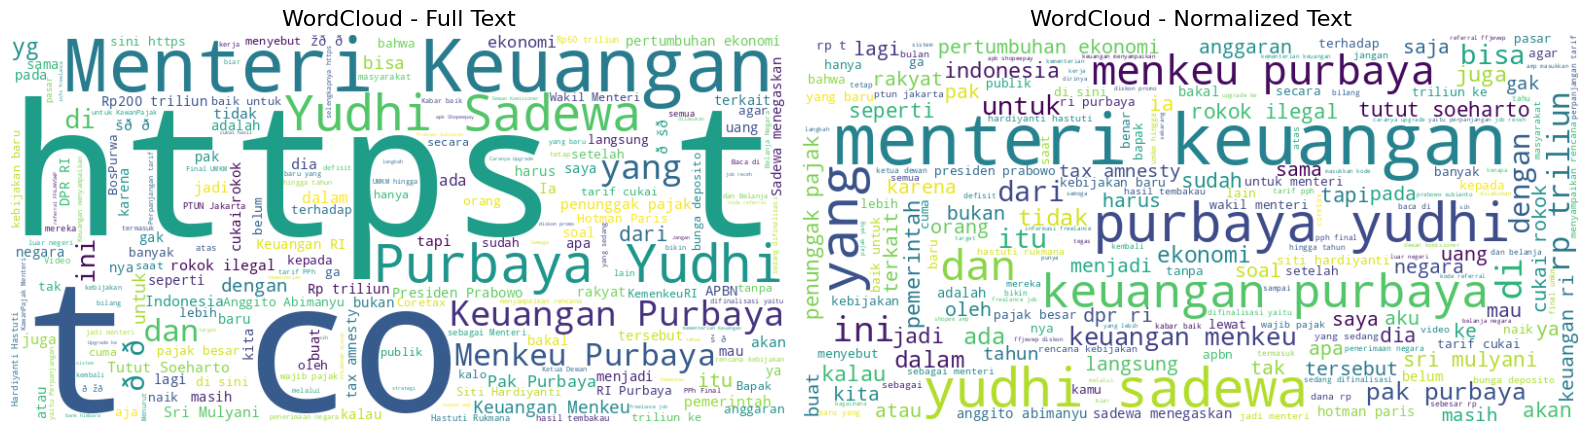

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# File paths
file_excel = "/content/drive/MyDrive/MENKEU PURBAYA.xlsx"
file_csv = "/content/drive/MyDrive/normalized_text_only.csv"

# Load data
df_excel = pd.read_excel(file_excel)
df_csv = pd.read_csv(file_csv)

# Pastikan kolom yang relevan ada
text_excel = " ".join(df_excel['full_text'].dropna().astype(str))
text_csv = " ".join(df_csv['normalized_text'].dropna().astype(str))

# Buat wordcloud untuk full_text dan normalized_text
wc_fulltext = WordCloud(width=800, height=400, background_color="white").generate(text_excel)
wc_normalized = WordCloud(width=800, height=400, background_color="white").generate(text_csv)

# Plot side by side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wc_fulltext, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Full Text", fontsize=16)

plt.subplot(1, 2, 2)
plt.imshow(wc_normalized, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Normalized Text", fontsize=16)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1684157403.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words_raw), y=list(freqs_raw), palette='magma')
/tmp/ipython-input-1684157403.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words_clean), y=list(freqs_clean), palette='viridis')
/tmp/ipython-input-1684157403.py:45: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1684157403.py:45: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missi

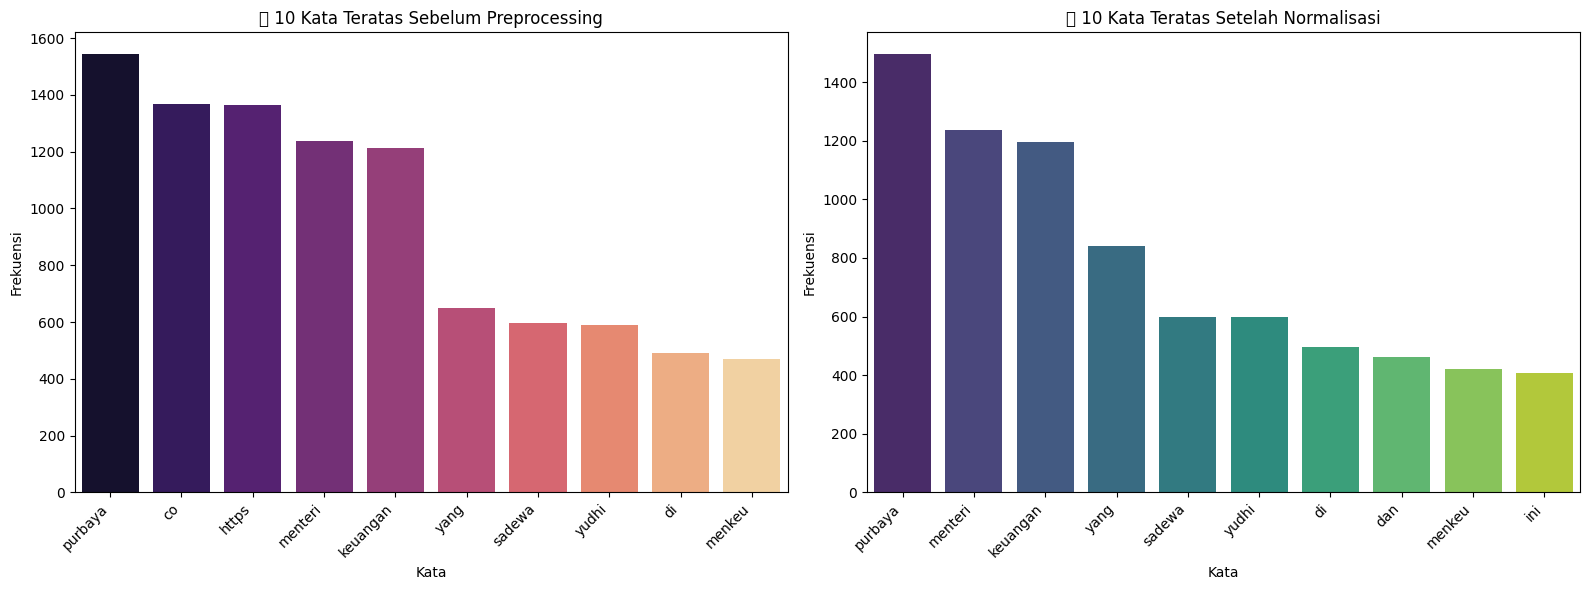


🔹 Top 10 Kata Sebelum Preprocessing:
  Kata_Sebelum  Frekuensi_Sebelum
0      purbaya               1543
1           co               1368
2        https               1366
3      menteri               1236
4     keuangan               1214
5         yang                650
6       sadewa                597
7        yudhi                590
8           di                492
9       menkeu                468

🔸 Top 10 Kata Setelah Normalisasi:
  Kata_Sesudah  Frekuensi_Sesudah
0      purbaya               1495
1      menteri               1237
2     keuangan               1197
3         yang                841
4       sadewa                599
5        yudhi                597
6           di                497
7          dan                462
8       menkeu                421
9          ini                408


In [ ]:
from collections import Counter
import seaborn as sns

# --- Load data ---
df_raw = pd.read_excel('/content/drive/MyDrive/MENKEU PURBAYA.xlsx')
df_clean = pd.read_csv('/content/drive/MyDrive/normalized_text_only.csv')

# --- Ambil teks sebelum & sesudah ---
raw_text = " ".join(df_raw['full_text'].dropna().astype(str))
clean_text = " ".join(df_clean['normalized_text'].dropna().astype(str))

# --- Fungsi untuk hitung frekuensi kata ---
def get_word_freq(text):
    words = re.findall(r'\b[a-zA-Z]{2,}\b', text.lower())  # ambil kata minimal 2 huruf
    return Counter(words)

freq_raw = get_word_freq(raw_text)
freq_clean = get_word_freq(clean_text)

# --- Ambil 10 kata teratas ---
top10_raw = freq_raw.most_common(10)
top10_clean = freq_clean.most_common(10)

# --- Pisahkan kata & frekuensi ---
words_raw, freqs_raw = zip(*top10_raw)
words_clean, freqs_clean = zip(*top10_clean)

# --- Visualisasi ---
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.barplot(x=list(words_raw), y=list(freqs_raw), palette='magma')
plt.title("🔹 10 Kata Teratas Sebelum Preprocessing")
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45, ha='right')

plt.subplot(1,2,2)
sns.barplot(x=list(words_clean), y=list(freqs_clean), palette='viridis')
plt.title("🔸 10 Kata Teratas Setelah Normalisasi")
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

df_raw_top = pd.DataFrame(top10_raw, columns=['Kata_Sebelum', 'Frekuensi_Sebelum'])
df_clean_top = pd.DataFrame(top10_clean, columns=['Kata_Sesudah', 'Frekuensi_Sesudah'])

print("\n🔹 Top 10 Kata Sebelum Preprocessing:")
print(df_raw_top)

print("\n🔸 Top 10 Kata Setelah Normalisasi:")
print(df_clean_top)

In [ ]:
!pip install transformers torch --quiet

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import pandas as pd

# --- 1. Load model multibahasa ---
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# --- 2. Buat pipeline sentimen ---
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# --- 3. Load data hasil preprocessing ---
df = pd.read_csv("/content/drive/MyDrive/normalized_text_only.csv")

# --- 4. Analisis sentimen dengan batas 512 token ---
df['sentiment_raw'] = df['normalized_text'].apply(lambda x: sentiment_pipeline(x[:512])[0]['label'])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

Device set to use cpu


KeyboardInterrupt: 

In [ ]:

def map_sentiment(label):
    if label in ['1 star','2 stars']:
        return 'Negatif'
    elif label == '3 stars':
        return 'Netral'
    else:
        return 'Positif'

df['sentiment'] = df['sentiment_raw'].apply(map_sentiment)

# --- 6. Simpan hasil ---
output_path = "/content/drive/MyDrive/sentiment_result_3label.csv"
df.to_csv(output_path, index=False)

# --- 7. Tampilkan hasil awal ---
print(df[['normalized_text', 'sentiment_raw', 'sentiment']].head())

                                     normalized_text sentiment_raw sentiment
0            menteri keuangan mulai mendapat simpati       4 stars   Positif
1  menteri keuangan purbaya yudhi sadewa melapork...        1 star   Negatif
2  ketua dewan ekonomi nasional indonesia luhut b...       4 stars   Positif
3  kementerian keuangan akan mengejar penagihan d...        1 star   Negatif
4  menteri keuangan purbaya yudhi sadewa dikenal ...       3 stars    Netral


In [ ]:
# --- 8. Cek hasil akhir ---
dc = pd.read_csv(output_path)
dc

,normalized_text,sentiment_raw,sentiment
0,menteri keuangan mulai mendapat simpati,4 stars,Positif
1,menteri keuangan purbaya yudhi sadewa melapork...,1 star,Negatif
2,ketua dewan ekonomi nasional indonesia luhut b...,4 stars,Positif
3,kementerian keuangan akan mengejar penagihan d...,1 star,Negatif
4,menteri keuangan purbaya yudhi sadewa dikenal ...,3 stars,Netral
...,...,...,...
1835,hotman paris protes bunga deposito turun purba...,1 star,Negatif
1836,diprotes hotman paris gegara bunga deposito tu...,1 star,Negatif
1837,hari ini saya berkesempatan bertemu dan berdis...,4 stars,Positif
1838,purbaya ungkap penjualan rokok ilegal di ecomm...,1 star,Negatif


⭐ 1 star → negatif

⭐⭐ 2 stars → negatif

⭐⭐⭐ 3 stars → netral

⭐⭐⭐⭐ 4 stars → positif

⭐⭐⭐⭐⭐ 5 stars → positif

In [ ]:
def convert_sentiment(label):
    if label in ["1 star","2 stars"]:
        return "negatif"
    elif label == "3 stars":
        return "netral"
    else:
        return "positif"

# Tambah kolom kategori sentimen
df['sentiment_category'] = df['sentiment'].apply(convert_sentiment)

# Simpan hasil
df.to_csv("/content/drive/MyDrive/sentiment_result_with_category.csv", index=False)

print(df[['normalized_text', 'sentiment', 'sentiment_category']].head())


                                     normalized_text sentiment  \
0            menteri keuangan mulai mendapat simpati   Positif   
1  menteri keuangan purbaya yudhi sadewa melapork...   Negatif   
2  ketua dewan ekonomi nasional indonesia luhut b...   Positif   
3  kementerian keuangan akan mengejar penagihan d...   Negatif   
4  menteri keuangan purbaya yudhi sadewa dikenal ...    Netral   

  sentiment_category  
0            positif  
1            positif  
2            positif  
3            positif  
4            positif  


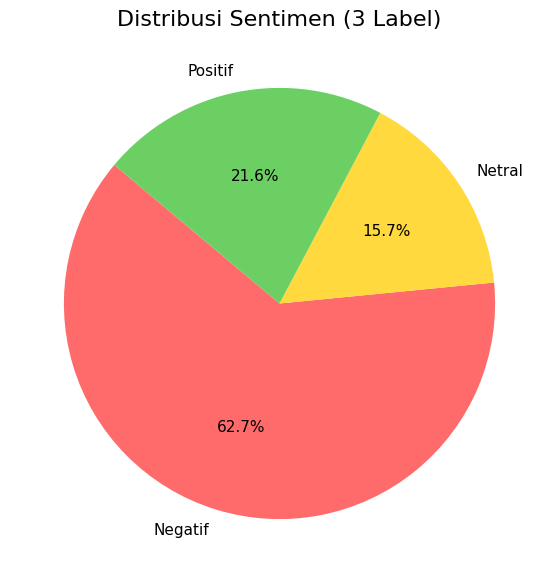

/tmp/ipython-input-2744722620.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


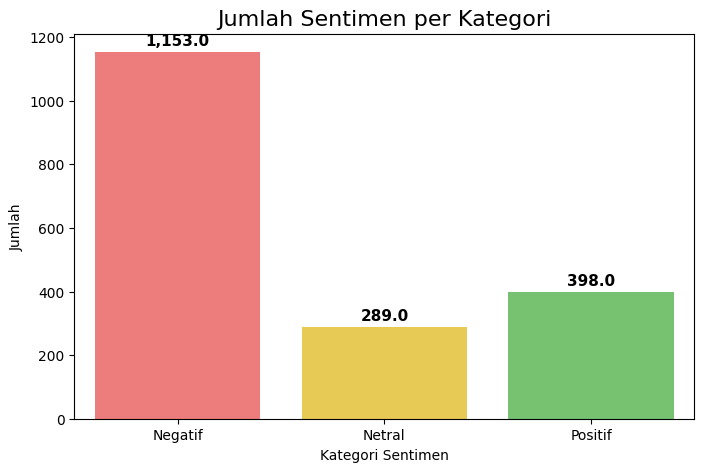

In [ ]:
# --- Distribusi Sentimen (3 Label) ---
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# --- 1. Mapping label jika perlu ---
# (pastikan kolom df['sentiment'] berisi: Negatif, Netral, Positif)
sentiment_map = {
    "Negatif": "Negatif",
    "Netral": "Netral",
    "Positif": "Positif"
}
df['sentiment_label'] = df['sentiment'].map(sentiment_map)

# --- 2. Perhitungan distribusi ---
order = ["Negatif", "Netral", "Positif"]
sentiment_counts = df['sentiment_label'].value_counts().reindex(order)

# --- 3. Pie chart ---
plt.figure(figsize=(7,7))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#ff6b6b', '#ffd93d', '#6bcf63'],
    textprops={'fontsize': 11}
)
plt.title("Distribusi Sentimen (3 Label)", fontsize=16)
plt.show()

# --- 4. Bar chart ---
plt.figure(figsize=(8,5))
ax = sns.countplot(
    x='sentiment_label',
    data=df,
    order=order,
    palette=['#ff6b6b', '#ffd93d', '#6bcf63']
)

plt.title("Jumlah Sentimen per Kategori", fontsize=16)
plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah")

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ','),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 8),
        textcoords='offset points',
        fontsize=11, fontweight='bold'
    )

plt.show()

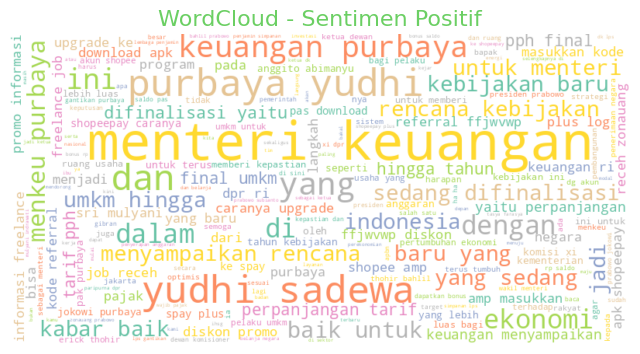

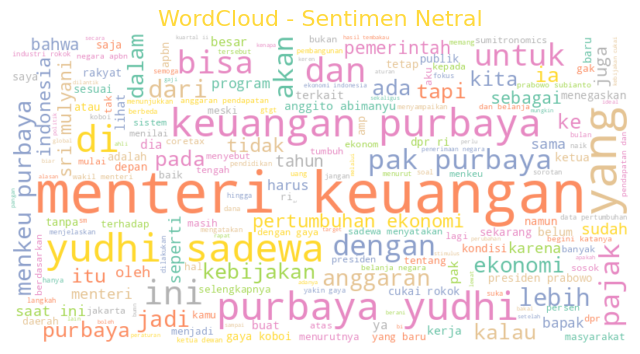

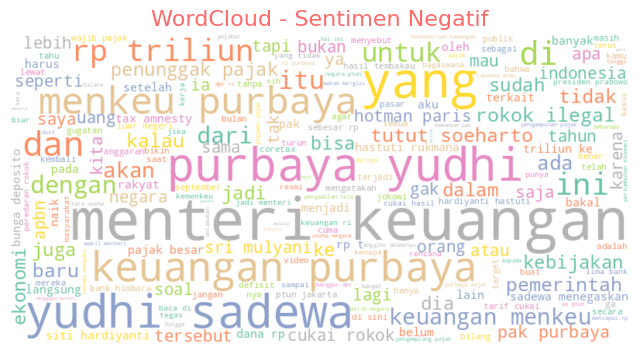

In [ ]:
# --- 5. WordCloud per kategori sentimen ---
for kategori, warna in zip(["Positif", "Netral", "Negatif"], ["#6bcf63", "#ffd93d", "#ff6b6b"]):
    text = " ".join(df[df['sentiment'] == kategori]['normalized_text'].dropna().astype(str))
    if text.strip():  # hanya jika ada teks
        wc = WordCloud(width=800, height=400, background_color="white", colormap="Set2").generate(text)
        plt.figure(figsize=(8, 6))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"WordCloud - Sentimen {kategori}", fontsize=16, color=warna)
        plt.show()

In [ ]:
pd.read_csv('/content/drive/MyDrive/sentiment_result_with_category.csv')

,normalized_text,sentiment,sentiment_category
0,menteri keuangan mulai mendapat simpati,4 stars,positif
1,menteri keuangan purbaya yudhi sadewa melapork...,1 star,negatif
2,ketua dewan ekonomi nasional indonesia luhut b...,4 stars,positif
3,kementerian keuangan akan mengejar penagihan d...,1 star,negatif
4,menteri keuangan purbaya yudhi sadewa dikenal ...,3 stars,netral
...,...,...,...
1835,hotman paris protes bunga deposito turun purba...,1 star,negatif
1836,diprotes hotman paris gegara bunga deposito tu...,1 star,negatif
1837,hari ini saya berkesempatan bertemu dan berdis...,4 stars,positif
1838,purbaya ungkap penjualan rokok ilegal di ecomm...,1 star,negatif


In [ ]:
import pandas as pd
import numpy as np

# --- 1. Load Data Utama ---
# Ganti path ini jika file Anda berada di lokasi lain
data_path = "/content/drive/MyDrive/sentiment_result_3label.csv"
try:
    df = pd.read_csv(data_path)
    print(f"Data berhasil dimuat. Jumlah baris: {len(df)}")
except FileNotFoundError:
    print(f"ERROR: File tidak ditemukan di {data_path}. Pastikan Anda sudah me-mount Drive Anda.")

# Pastikan kolom normalized_text ada
if 'normalized_text' not in df.columns:
    print("ERROR: Kolom 'normalized_text' tidak ditemukan dalam DataFrame.")

# --- 2. Load Custom Stopword List dari sw.csv ---
sw_path = "/content/drive/MyDrive/sw.csv" # Sesuaikan path sw.csv
try:
    # Memuat file sw.csv. Asumsi file ini hanya berisi daftar kata per baris atau satu kolom.
    custom_stopwords = pd.read_csv(sw_path, header=None, encoding='utf-8')

    # Ambil kolom pertama (asumsi stopword ada di kolom pertama)
    stop_words_list = custom_stopwords.iloc[:, 0].tolist()
    stop_words_list = [str(item).lower() for item in stop_words_list] # Pastikan lowercase

    print(f"Custom stopword list berhasil dimuat. Jumlah stopword: {len(stop_words_list)}")

    # Tambahkan stopword tambahan yang mungkin terlewat
    tambahan_stop = ['retweet', 'rt', 'user', 'via', 'yg', 'ini', 'itu', 'di', 'dan', 'sama', 'macam', 'untuk']
    # Tambahkan nama entitas utama yang harus selalu dihapus
    nama_entitas = ['yudha', 'purbaya', 'sadewa', 'pak yudha', 'menkeu', 'menkeu baru', 'menkeu_baru']

    stop_words_list.extend(tambahan_stop)
    stop_words_list.extend(nama_entitas)
    stop_words_list = list(set(stop_words_list)) # Hapus duplikasi

except FileNotFoundError:
    print(f"ERROR: File stopword tidak ditemukan di {sw_path}. Hanya menggunakan list tambahan.")
    stop_words_list = tambahan_stop + nama_entitas
except Exception as e:
    print(f"ERROR: Terjadi masalah saat memuat sw.csv: {e}. Hanya menggunakan list tambahan.")
    stop_words_list = tambahan_stop + nama_entitas


# --- 3. Fungsi Penghapusan Stopword ---
def remove_custom_stopwords(text, stopwords):
    if pd.isna(text):
        return ""
    words = text.split()
    # Filter kata yang tidak ada di list stopword
    filtered_words = [word for word in words if word not in stopwords]
    return " ".join(filtered_words)

# --- 4. Terapkan ke Kolom Baru ---
# Kita buat kolom baru 'text_for_viz_topic' agar kolom 'normalized_text' tetap utuh
df['text_for_viz_topic'] = df['normalized_text'].apply(
    lambda x: remove_custom_stopwords(x, stop_words_list)
)

# --- 5. Verifikasi Hasil ---
print("\nContoh Teks Setelah Stopword Removal (Kolom Baru):")
print("Teks Asli:", df['normalized_text'].iloc[0])
print("Teks Bersih:", df['text_for_viz_topic'].iloc[0])

# Sekarang, Anda bisa menggunakan kolom 'text_for_viz_topic' untuk Pemodelan Topik (LDA)
# dan membuat Word Cloud yang informatif.

# Tampilkan 5 baris pertama untuk memastikan hasilnya benar
df.head()

In [ ]:
pd.read_csv('/content/drive/MyDrive/sw.csv')

,kamus
0,ada
1,adalah
2,adanya
3,adapun
4,agak
...,...
1128,s
1129,hingg
1130,ny
1131,k


In [ ]:
import pandas as pd
import numpy as np

# --- Konfigurasi Path ---
data_path = "/content/drive/MyDrive/sentiment_result_with_category.csv"
sw_path = "/content/drive/MyDrive/sw.csv"

# --- 1. Load Data Utama ---
try:
    df = pd.read_csv(data_path)
    print(f"Data utama berhasil dimuat. Jumlah baris: {len(df)}")
except FileNotFoundError:
    print(f"ERROR: File data utama tidak ditemukan di {data_path}. Hentikan eksekusi.")
    df = None

if df is not None and 'normalized_text' not in df.columns:
    print("ERROR: Kolom 'normalized_text' tidak ditemukan dalam DataFrame. Hentikan eksekusi.")
    df = None

# --- 2. Load Custom Stopword List dari sw.csv (Kolom 'kamus') ---
stop_words_list = []
if df is not None:
    try:
        # Memuat file sw.csv
        sw_df = pd.read_csv(sw_path, encoding='utf-8')

        # Ambil kolom 'kamus'
        if 'kamus' in sw_df.columns:
            stop_words_list = sw_df['kamus'].dropna().tolist()
            # Pastikan semua stopword diubah ke huruf kecil (lowercase)
            stop_words_list = [str(item).lower() for item in stop_words_list]

            print(f"Custom stopword list berhasil dimuat dari kolom 'kamus'. Jumlah stopword: {len(stop_words_list)}")
        else:
            print(f"ERROR: Kolom 'kamus' tidak ditemukan di {sw_path}.")

    except FileNotFoundError:
        print(f"ERROR: File stopword tidak ditemukan di {sw_path}.")
    except Exception as e:
        print(f"ERROR: Terjadi masalah saat memuat sw.csv: {e}.")

# --- 3. Fungsi Penghapusan Stopword ---
def remove_custom_stopwords(text, stopwords):
    """Menghapus kata-kata dari teks jika kata tersebut ada di list stopwords."""
    if pd.isna(text) or not isinstance(text, str):
        return ""

    # Memecah teks menjadi kata-kata (token)
    words = text.split()

    # Filter kata yang tidak ada di list stopword
    filtered_words = [word for word in words if word not in stopwords]

    # Menggabungkan kembali kata-kata menjadi string
    return " ".join(filtered_words)

# --- 4. Terapkan ke Kolom Baru (Hanya jika data berhasil dimuat) ---
if df is not None:
    print("\nMulai proses penghapusan stopword...")
    # Kita buat kolom baru 'text_for_viz_topic'
    df['text_for_viz_topic'] = df['normalized_text'].apply(
        lambda x: remove_custom_stopwords(x, stop_words_list)
    )

    # --- 5. Verifikasi Hasil ---
    print("\nVerifikasi Hasil Penghapusan Stopword:")
    # Tampilkan beberapa baris untuk melihat perbandingannya
    for i in range(min(5, len(df))):
        print(f"Original: {df['normalized_text'].iloc[i]}")
        print(f"Bersih:   {df['text_for_viz_topic'].iloc[i]}\n")

    # Kolom 'text_for_viz_topic' sekarang siap digunakan untuk Word Cloud dan LDA.

Data utama berhasil dimuat. Jumlah baris: 1840
Custom stopword list berhasil dimuat dari kolom 'kamus'. Jumlah stopword: 1133

Mulai proses penghapusan stopword...

Verifikasi Hasil Penghapusan Stopword:
Original: menteri keuangan mulai mendapat simpati
Bersih:   menteri keuangan simpati

Original: menteri keuangan purbaya yudhi sadewa melaporkan posisi anggaran pendapatan dan belanja negara apbn sampai agustus mengalami defisit rp triliun jumlah ini persen dari produk domestik bruto pdb
Bersih:   menteri keuangan purbaya yudhi sadewa melaporkan posisi anggaran pendapatan belanja negara apbn agustus mengalami defisit rp triliun persen produk domestik bruto pdb

Original: ketua dewan ekonomi nasional indonesia luhut binsar pandjaitan merespons gaya koboi menteri keuangan ri purbaya yudhi sadewa luhut justru melihatnya positif
Bersih:   ketua dewan ekonomi nasional indonesia luhut binsar pandjaitan merespons gaya koboi menteri keuangan ri purbaya yudhi sadewa luhut positif

Original: kem

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# --- Konfigurasi Path ---
data_path = "/content/drive/MyDrive/sentiment_result_with_category.csv"
sw_path = "/content/drive/MyDrive/sw.csv"

# [Kode 1, 2, 3, 4: Load Data, Stopword List, Fungsi Stopword, dan Penerapan ke Kolom Baru]
# ... (Kode Anda dari 1-4 tetap sama di sini) ...

# --- 1. Load Data Utama ---
df = None
try:
    df = pd.read_csv(data_path)
    print(f"Data utama berhasil dimuat. Jumlah baris: {len(df)}")
except FileNotFoundError:
    print(f"ERROR: File data utama tidak ditemukan di {data_path}. Hentikan eksekusi.")

if df is not None and 'normalized_text' not in df.columns:
    print("ERROR: Kolom 'normalized_text' tidak ditemukan dalam DataFrame. Hentikan eksekusi.")
    df = None

# --- 2. Load Custom Stopword List dari sw.csv (Kolom 'kamus') ---
stop_words_list = []
if df is not None:
    try:
        # Memuat file sw.csv
        sw_df = pd.read_csv(sw_path, encoding='utf-8')

        # Ambil kolom 'kamus'
        if 'kamus' in sw_df.columns:
            stop_words_list = sw_df['kamus'].dropna().tolist()
            stop_words_list = [str(item).lower() for item in stop_words_list]

            print(f"Custom stopword list berhasil dimuat dari kolom 'kamus'. Jumlah stopword: {len(stop_words_list)}")
        else:
            print(f"ERROR: Kolom 'kamus' tidak ditemukan di {sw_path}.")

    except FileNotFoundError:
        print(f"ERROR: File stopword tidak ditemukan di {sw_path}.")
    except Exception as e:
        print(f"ERROR: Terjadi masalah saat memuat sw.csv: {e}.")

# --- 3. Fungsi Penghapusan Stopword ---
def remove_custom_stopwords(text, stopwords):
    """Menghapus kata-kata dari teks jika kata tersebut ada di list stopwords."""
    if pd.isna(text) or not isinstance(text, str):
        return ""

    words = text.split()

    # Filter kata yang tidak ada di list stopword
    filtered_words = [word for word in words if word not in stopwords]

    return " ".join(filtered_words)

# --- 4. Terapkan ke Kolom Baru ---
if df is not None:
    print("\nMulai proses penghapusan stopword...")
    df['text_for_viz_topic'] = df['normalized_text'].apply(
        lambda x: remove_custom_stopwords(x, stop_words_list)
    )

    # --- 5. Verifikasi Hasil ---
    print("\nVerifikasi Hasil Penghapusan Stopword:")
    for i in range(min(5, len(df))):
        print(f"Original: {df['normalized_text'].iloc[i]}")
        print(f"Bersih:   {df['text_for_viz_topic'].iloc[i]}\n")

    # --- 5.5. VERIFIKASI KRITIS JUMLAH DATA NON-KOSONG ---
    df['is_empty'] = df['text_for_viz_topic'].str.strip().apply(lambda x: len(x) == 0)
    total_kosong = df['is_empty'].sum()
    total_non_kosong = len(df) - total_kosong

    print("--- STATUS DATA SETELAH PEMBERSIHAN ---")
    print(f"Total baris data awal: {len(df)}")
    print(f"Jumlah baris yang teksnya KOSONG: {total_kosong}")
    print(f"Jumlah baris yang masih memiliki teks (NON-KOSONG): {total_non_kosong}")

    if total_non_kosong == 0:
        print("\n!!! GAGAL VISUALISASI: Tidak ada data teks yang tersisa. Stopword list terlalu agresif. !!!")
        print("Solusi: Periksa dan kurangi kata-kata di file sw.csv.")

    # --- 6. Buat Word Cloud (Lanjut jika ada data non-kosong) ---
    elif 'Sentiment' in df.columns:

        # Definisikan fungsi Word Cloud (sama seperti sebelumnya)
        def create_word_cloud(text_data, title, max_words=100, color='viridis'):
            long_string = ' '.join(text_data.astype(str))

            if not long_string.strip():
                print(f"Peringatan: Tidak ada data teks untuk sentimen {title}. Word Cloud dilewati.")
                return

            wordcloud = WordCloud(
                background_color="white",
                max_words=max_words,
                width=800,
                height=400,
                colormap=color,
                collocations=False
            )

            wordcloud.generate(long_string)

            plt.figure(figsize=(12, 6))
            plt.imshow(wordcloud, interpolation="bilinear")
            plt.axis("off")
            plt.title(f'Word Cloud Sentimen: {title}', fontsize=18)
            plt.show() # Perintah ini yang menampilkan plot di notebook

        # Pisahkan Data yang NON-KOSONG Berdasarkan Label Sentimen
        df_clean = df[~df['is_empty']] # Filter hanya data yang tidak kosong

        print("\n--- Memproses Word Cloud untuk Setiap Sentimen ---")

        df_positive = df_clean[df_clean['Sentiment'] == 'Positif']['text_for_viz_topic'].dropna()
        df_negative = df_clean[df_clean['Sentiment'] == 'Negatif']['text_for_viz_topic'].dropna()
        df_neutral = df_clean[df_clean['Sentiment'] == 'Netral']['text_for_viz_topic'].dropna()

        # Word Cloud Positif
        create_word_cloud(df_positive, "POSITIF", color='summer')


        # Word Cloud Negatif
        create_word_cloud(df_negative, "NEGATIF", color='autumn')


        # Word Cloud Netral
        create_word_cloud(df_neutral, "NETRAL", color='winter')


        print("\nPembuatan Word Cloud Selesai. Visualisasi harus muncul di bawah ini jika data tersisa memadai.")
    else:
        print("Peringatan: Kolom 'Sentiment' tidak ditemukan. Word Cloud tidak dapat dibuat berdasarkan label.")

Data utama berhasil dimuat. Jumlah baris: 1840
Custom stopword list berhasil dimuat dari kolom 'kamus'. Jumlah stopword: 1133

Mulai proses penghapusan stopword...

Verifikasi Hasil Penghapusan Stopword:
Original: menteri keuangan mulai mendapat simpati
Bersih:   menteri keuangan simpati

Original: menteri keuangan purbaya yudhi sadewa melaporkan posisi anggaran pendapatan dan belanja negara apbn sampai agustus mengalami defisit rp triliun jumlah ini persen dari produk domestik bruto pdb
Bersih:   menteri keuangan purbaya yudhi sadewa melaporkan posisi anggaran pendapatan belanja negara apbn agustus mengalami defisit rp triliun persen produk domestik bruto pdb

Original: ketua dewan ekonomi nasional indonesia luhut binsar pandjaitan merespons gaya koboi menteri keuangan ri purbaya yudhi sadewa luhut justru melihatnya positif
Bersih:   ketua dewan ekonomi nasional indonesia luhut binsar pandjaitan merespons gaya koboi menteri keuangan ri purbaya yudhi sadewa luhut positif

Original: kem

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# --- [Asumsi: Kode 1-5, termasuk loading data, stopword removal, dan pembuatan df['text_for_viz_topic'] sudah berjalan] ---

# Agar kode ini dapat dieksekusi mandiri, saya sertakan kembali kerangka loading data,
# tetapi fokus pada pemrosesan sentimen:

data_path = "/content/drive/MyDrive/sentiment_result_with_category.csv"
try:
    df = pd.read_csv(data_path)
    # Asumsi: df['text_for_viz_topic'] sudah ada atau bisa dibuat ulang (jika list stopword sudah didefinisikan)
    # Untuk tujuan diagnosis ini, kita fokus pada filtering Sentiment.
    if 'Sentiment' not in df.columns or 'text_for_viz_topic' not in df.columns:
        print("ERROR: Kolom 'Sentiment' atau 'text_for_viz_topic' tidak ditemukan.")
        df = None
except:
    df = None

if df is not None:

    # --- LANGKAH REVISI KRITIS: Mengubah Label Sentimen menjadi Huruf Kecil ---

    if 'Sentiment' in df.columns:
        print("Mengubah label Sentimen menjadi huruf kecil untuk filtering yang akurat...")
        df['Sentiment_lower'] = df['Sentiment'].str.lower()
    else:
        print("ERROR: Kolom 'Sentiment' tidak ditemukan.")
        exit()

    # --- VERIFIKASI KRITIS JUMLAH DATA NON-KOSONG ---
    df['is_empty'] = df['text_for_viz_topic'].str.strip().apply(lambda x: len(x) == 0)
    df_clean = df[~df['is_empty']] # Filter data yang tidak kosong

    total_non_kosong = len(df_clean)

    print(f"\nTotal baris yang masih memiliki teks (NON-KOSONG): {total_non_kosong}")
    print("Distribusi sentimen (lowercase) pada data non-kosong:")
    print(df_clean['Sentiment_lower'].value_counts())

    if total_non_kosong == 0:
        print("\n!!! GAGAL VISUALISASI: Tidak ada data teks yang tersisa. Cek sw.csv Anda. !!!")

    # --- 6. Buat Word Cloud (dengan Label Huruf Kecil) ---
    elif total_non_kosong > 0:

        def create_word_cloud(text_data, title, max_words=100, color='viridis'):
            long_string = ' '.join(text_data.astype(str))

            if not long_string.strip():
                print(f"Peringatan: Tidak ada data teks untuk sentimen {title}. Word Cloud dilewati.")
                return

            wordcloud = WordCloud(
                background_color="white",
                max_words=max_words,
                width=800,
                height=400,
                colormap=color,
                collocations=False
            )

            wordcloud.generate(long_string)

            plt.figure(figsize=(12, 6))
            plt.imshow(wordcloud, interpolation="bilinear")
            plt.axis("off")
            plt.title(f'Word Cloud Sentimen: {title.upper()}', fontsize=18)
            plt.show()

        print("\n--- Memproses Word Cloud untuk Setiap Sentimen (Revisi Case) ---")

        # Pisahkan data menggunakan kolom baru 'Sentiment_lower'
        df_positive = df_clean[df_clean['Sentiment_lower'] == 'positif']['text_for_viz_topic'].dropna()
        df_negative = df_clean[df_clean['Sentiment_lower'] == 'negatif']['text_for_viz_topic'].dropna()
        df_neutral = df_clean[df_clean['Sentiment_lower'] == 'netral']['text_for_viz_topic'].dropna()

        # Word Cloud Positif
        create_word_cloud(df_positive, "positif", color='summer')


        # Word Cloud Negatif
        create_word_cloud(df_negative, "negatif", color='autumn')


        # Word Cloud Netral
        create_word_cloud(df_neutral, "netral", color='winter')


        print("\nPembuatan Word Cloud Selesai. Visualisasi seharusnya sudah muncul.")

# --- Jika masih belum muncul, jalankan DIAGNOSIS PLOT MATPLOTLIB di bawah ini ---

# DIAGNOSIS: Coba jalankan plot sederhana Matplotlib di sel terpisah!
# print("\n--- DIAGNOSIS: Plot Matplotlib Standar ---")
# if df is not None:
#     df_clean['Sentiment_lower'].value_counts().plot(kind='bar')
#     plt.title("TEST PLOT BAR")
#     plt.show()

ERROR: Kolom 'Sentiment' atau 'text_for_viz_topic' tidak ditemukan.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# --- Konfigurasi Path ---
data_path = "/content/drive/MyDrive/sentiment_result_with_category.csv"
sw_path = "/content/drive/MyDrive/sw.csv"

# --- 1. Load Data Utama ---
df = None
try:
    df = pd.read_csv(data_path)
    print(f"Data utama berhasil dimuat. Jumlah baris: {len(df)}")
except FileNotFoundError:
    print(f"ERROR: File data utama tidak ditemukan di {data_path}. Hentikan eksekusi.")

if df is not None and 'normalized_text' not in df.columns:
    print("ERROR: Kolom 'normalized_text' tidak ditemukan dalam DataFrame. Hentikan eksekusi.")
    df = None

# --- 2. Load Custom Stopword List SEMENTARA ---
# Kita gunakan HANYA kata-kata yang SANGAT JELAS ingin dihapus,
# mengabaikan sw.csv untuk diagnosis ini, untuk memastikan ada teks yang tersisa.
stop_words_list = []
if df is not None:
    # --- LIST STOPWORD AGRESIVITAS RENDAH (UNTUK DEBUGGING) ---
    stop_words_list_debug = [
        'purbaya', 'yudhi', 'sadewa', 'menkeu', 'menkeu baru', 'retweet', 'rt', 'via', 'user', 'di',
        'dan', 'yang', 'itu', 'ini', 'untuk', 'sama', 'macam'
    ]
    stop_words_list = stop_words_list_debug
    print(f"Menggunakan Stopword Debug List. Jumlah stopword: {len(stop_words_list)}")


# --- 3. Fungsi Penghapusan Stopword ---
def remove_custom_stopwords(text, stopwords):
    if pd.isna(text) or not isinstance(text, str):
        return ""
    words = text.split()
    # Filter kata yang tidak ada di list stopword
    filtered_words = [word for word in words if word not in stopwords]
    return " ".join(filtered_words)

# --- 4. Terapkan ke Kolom Baru ---
if df is not None:
    print("\nMulai proses penghapusan stopword (DEBUG MODE)...")
    df['text_for_viz_topic'] = df['normalized_text'].apply(
        lambda x: remove_custom_stopwords(x, stop_words_list)
    )

    # --- 5. Verifikasi Hasil & Cek Jumlah Data ---
    df['is_empty'] = df['text_for_viz_topic'].str.strip().apply(lambda x: len(x) == 0)
    df_clean = df[~df['is_empty']]

    # [Tambahan Penting] Mengubah label Sentimen menjadi Huruf Kecil
    if 'Sentiment' in df.columns:
        df['Sentiment_lower'] = df['Sentiment'].str.lower()
    else:
        print("ERROR: Kolom 'Sentiment' tidak ditemukan.")
        df = None # Hentikan jika kolom sentimen tidak ada

    if df is not None:
        total_non_kosong = len(df_clean)
        print("\n--- STATUS DATA SETELAH PEMBERSIHAN (DEBUG) ---")
        print(f"Jumlah baris yang masih memiliki teks: {total_non_kosong}")
        print("Distribusi sentimen (lowercase) pada data non-kosong:")
        print(df_clean['Sentiment_lower'].value_counts())


    # --- 6. Buat Word Cloud (dengan Label Huruf Kecil) ---
    if df is not None and total_non_kosong > 0:

        def create_word_cloud(text_data, title, max_words=100, color='viridis'):
            long_string = ' '.join(text_data.astype(str))

            if not long_string.strip():
                print(f"Peringatan: Tidak ada data teks untuk sentimen {title}. Word Cloud dilewati.")
                return

            wordcloud = WordCloud(
                background_color="white",
                max_words=max_words,
                width=800,
                height=400,
                colormap=color,
                collocations=False
            )

            wordcloud.generate(long_string)

            plt.figure(figsize=(12, 6))
            plt.imshow(wordcloud, interpolation="bilinear")
            plt.axis("off")
            plt.title(f'Word Cloud Sentimen: {title.upper()} (DEBUG MODE)', fontsize=18)
            plt.show()

        print("\n--- Memproses Word Cloud (DEBUG MODE) ---")

        # Pisahkan data menggunakan kolom 'Sentiment_lower' pada data bersih
        df_positive = df_clean[df_clean['Sentiment_lower'] == 'positif']['text_for_viz_topic'].dropna()
        df_negative = df_clean[df_clean['Sentiment_lower'] == 'negatif']['text_for_viz_topic'].dropna()
        df_neutral = df_clean[df_clean['Sentiment_lower'] == 'netral']['text_for_viz_topic'].dropna()

        # Word Cloud Positif
        create_word_cloud(df_positive, "positif", color='summer')

        # Word Cloud Negatif
        create_word_cloud(df_negative, "negatif", color='autumn')

        # Word Cloud Netral
        create_word_cloud(df_neutral, "netral", color='winter')

        print("\nDIAGNOSIS SELESAI. Jika Word Cloud muncul, masalahnya 100% ada pada file sw.csv Anda.")

Data utama berhasil dimuat. Jumlah baris: 1840
Menggunakan Stopword Debug List. Jumlah stopword: 17

Mulai proses penghapusan stopword (DEBUG MODE)...
ERROR: Kolom 'Sentiment' tidak ditemukan.


In [ ]:
import pandas as pd
import numpy as np

# --- Konfigurasi Path ---
data_path = "/content/drive/MyDrive/sentiment_result_with_category.csv"
sw_path = "/content/drive/MyDrive/sw.csv"
output_path = "/content/drive/MyDrive/sentiment_after_stopword_removal.csv"

# --- 1. Load Data Utama ---
df = None
try:
    df = pd.read_csv(data_path)
    print(f"Data utama berhasil dimuat. Jumlah baris: {len(df)}")
except FileNotFoundError:
    print(f"ERROR: File data utama tidak ditemukan di {data_path}. Hentikan eksekusi.")

if df is not None and 'normalized_text' not in df.columns:
    print("ERROR: Kolom 'normalized_text' tidak ditemukan dalam DataFrame.")
    df = None

# --- 2. Load Custom Stopword List dari sw.csv ---
stop_words_list = []

if df is not None:
    try:
        sw_df = pd.read_csv(sw_path, encoding='utf-8')

        if 'kamus' in sw_df.columns:
            stop_words_list = (
                sw_df['kamus']
                .dropna()
                .astype(str)
                .str.lower()
                .tolist()
            )
            print(f"Custom stopword list dimuat. Jumlah stopword: {len(stop_words_list)}")
        else:
            print("ERROR: Kolom 'kamus' tidak ditemukan di sw.csv")

    except FileNotFoundError:
        print(f"ERROR: File stopword tidak ditemukan di {sw_path}")
    except Exception as e:
        print(f"ERROR saat membaca sw.csv: {e}")

# --- 3. Fungsi Penghapusan Stopword ---
def remove_custom_stopwords(text, stopwords):
    if pd.isna(text) or not isinstance(text, str):
        return ""

    words = text.split()
    filtered_words = [word for word in words if word not in stopwords]
    return " ".join(filtered_words)

# --- 4. Terapkan Stopword Removal ---
if df is not None:
    print("\nMulai proses penghapusan stopword...")
    df['text_for_viz_topic'] = df['normalized_text'].apply(
        lambda x: remove_custom_stopwords(x, stop_words_list)
    )

    # --- 5. Verifikasi Singkat ---
    print("\nContoh hasil (5 baris pertama):")
    for i in range(min(5, len(df))):
        print(f"Original: {df['normalized_text'].iloc[i]}")
        print(f"Bersih:   {df['text_for_viz_topic'].iloc[i]}\n")

    # --- 6. Cek jumlah teks kosong ---
    df['is_empty'] = df['text_for_viz_topic'].str.strip().apply(lambda x: len(x) == 0)

    total_kosong = df['is_empty'].sum()
    total_non_kosong = len(df) - total_kosong

    print("--- STATUS DATA SETELAH STOPWORD REMOVAL ---")
    print(f"Total data           : {len(df)}")
    print(f"Teks kosong          : {total_kosong}")
    print(f"Teks non-kosong      : {total_non_kosong}")

    if total_non_kosong == 0:
        print("\n!!! PERINGATAN: Semua teks habis. Stopword terlalu agresif !!!")
        print("Silakan cek ulang isi sw.csv")

    # --- 7. Simpan ke CSV ---
    df.to_csv(output_path, index=False, encoding='utf-8-sig')
    print(f"\n✅ Data hasil stopword removal berhasil disimpan ke:")
    print(output_path)


Data utama berhasil dimuat. Jumlah baris: 1840
Custom stopword list dimuat. Jumlah stopword: 1133

Mulai proses penghapusan stopword...

Contoh hasil (5 baris pertama):
Original: menteri keuangan mulai mendapat simpati
Bersih:   menteri keuangan simpati

Original: menteri keuangan purbaya yudhi sadewa melaporkan posisi anggaran pendapatan dan belanja negara apbn sampai agustus mengalami defisit rp triliun jumlah ini persen dari produk domestik bruto pdb
Bersih:   menteri keuangan purbaya yudhi sadewa melaporkan posisi anggaran pendapatan belanja negara apbn agustus mengalami defisit rp triliun persen produk domestik bruto pdb

Original: ketua dewan ekonomi nasional indonesia luhut binsar pandjaitan merespons gaya koboi menteri keuangan ri purbaya yudhi sadewa luhut justru melihatnya positif
Bersih:   ketua dewan ekonomi nasional indonesia luhut binsar pandjaitan merespons gaya koboi menteri keuangan ri purbaya yudhi sadewa luhut positif

Original: kementerian keuangan akan mengejar pen

In [ ]:
import pandas as pd
import numpy as np

# --- Konfigurasi Path ---
data_path = "/content/drive/MyDrive/sentiment_result_with_category.csv"
sw_path = "/content/drive/MyDrive/sw.csv"
output_path = "/content/drive/MyDrive/sentiment_after_stopword_removal.csv"

# --- 1. Load Data Utama ---
df = None
try:
    df = pd.read_csv(data_path)
    print(f"Data utama berhasil dimuat. Jumlah baris: {len(df)}")
except FileNotFoundError:
    print(f"ERROR: File data utama tidak ditemukan di {data_path}. Hentikan eksekusi.")

if df is not None and 'normalized_text' not in df.columns:
    print("ERROR: Kolom 'normalized_text' tidak ditemukan dalam DataFrame.")
    df = None

# --- 2. Load Custom Stopword List dari sw.csv ---
stop_words_list = []

if df is not None:
    try:
        sw_df = pd.read_csv(sw_path, encoding='utf-8')

        if 'kamus' in sw_df.columns:
            stop_words_list = (
                sw_df['kamus']
                .dropna()
                .astype(str)
                .str.lower()
                .tolist()
            )
            print(f"Custom stopword list dimuat. Jumlah stopword awal: {len(stop_words_list)}")
        else:
            print("ERROR: Kolom 'kamus' tidak ditemukan di sw.csv")

    except FileNotFoundError:
        print(f"ERROR: File stopword tidak ditemukan di {sw_path}")
    except Exception as e:
        print(f"ERROR saat membaca sw.csv: {e}")

# --- 2.5 Tambahan Stopword Manual (Indonesia / Singkatan) ---
additional_stopwords = [
    "dg", "dgn", "dengan",
    "yg", "yang",
    "aja", "saja",
    "kok", "deh", "lah", "nih",
    "nya",
    "dll", "dsb",
    "krn", "karena",
    "utk", "untuk",
    "pd", "pada",
    "shoopepay", "ffjwvwp"
]

# Gabungkan stopword file + manual
stop_words_list = list(set(stop_words_list + additional_stopwords))
print(f"Total stopword setelah digabung: {len(stop_words_list)}")

# --- 3. Fungsi Penghapusan Stopword ---
def remove_custom_stopwords(text, stopwords):
    if pd.isna(text) or not isinstance(text, str):
        return ""

    words = text.split()
    filtered_words = [word for word in words if word not in stopwords]
    return " ".join(filtered_words)

# --- 4. Terapkan Stopword Removal ---
if df is not None:
    print("\nMulai proses penghapusan stopword...")
    df['text_for_viz_topic'] = df['normalized_text'].apply(
        lambda x: remove_custom_stopwords(x, stop_words_list)
    )

    # --- 5. Verifikasi Singkat ---
    print("\nContoh hasil (5 baris pertama):")
    for i in range(min(5, len(df))):
        print(f"Original: {df['normalized_text'].iloc[i]}")
        print(f"Bersih:   {df['text_for_viz_topic'].iloc[i]}\n")

    # --- 6. Cek jumlah teks kosong ---
    df['is_empty'] = df['text_for_viz_topic'].str.strip().apply(lambda x: len(x) == 0)

    total_kosong = df['is_empty'].sum()
    total_non_kosong = len(df) - total_kosong

    print("--- STATUS DATA SETELAH STOPWORD REMOVAL ---")
    print(f"Total data           : {len(df)}")
    print(f"Teks kosong          : {total_kosong}")
    print(f"Teks non-kosong      : {total_non_kosong}")

    if total_non_kosong == 0:
        print("\n!!! PERINGATAN: Semua teks habis. Stopword terlalu agresif !!!")
        print("Silakan cek ulang isi sw.csv")

    # --- 7. Simpan ke CSV ---
    df.to_csv(output_path, index=False, encoding='utf-8-sig')
    print(f"\n✅ Data hasil stopword removal berhasil disimpan ke:")
    print(output_path)


Data utama berhasil dimuat. Jumlah baris: 1840
Custom stopword list dimuat. Jumlah stopword awal: 1133
Total stopword setelah digabung: 1133

Mulai proses penghapusan stopword...

Contoh hasil (5 baris pertama):
Original: menteri keuangan mulai mendapat simpati
Bersih:   menteri keuangan simpati

Original: menteri keuangan purbaya yudhi sadewa melaporkan posisi anggaran pendapatan dan belanja negara apbn sampai agustus mengalami defisit rp triliun jumlah ini persen dari produk domestik bruto pdb
Bersih:   menteri keuangan purbaya yudhi sadewa melaporkan posisi anggaran pendapatan belanja negara apbn agustus mengalami defisit rp triliun persen produk domestik bruto pdb

Original: ketua dewan ekonomi nasional indonesia luhut binsar pandjaitan merespons gaya koboi menteri keuangan ri purbaya yudhi sadewa luhut justru melihatnya positif
Bersih:   ketua dewan ekonomi nasional indonesia luhut binsar pandjaitan merespons gaya koboi menteri keuangan ri purbaya yudhi sadewa luhut positif

Origi

In [ ]:
pd.read_csv("/content/drive/MyDrive/sentiment_after_stopword_removal.csv")

,normalized_text,sentiment,sentiment_category,text_for_viz_topic,is_empty
0,menteri keuangan mulai mendapat simpati,4 stars,positif,menteri keuangan simpati,False
1,menteri keuangan purbaya yudhi sadewa melapork...,1 star,negatif,menteri keuangan purbaya yudhi sadewa melapork...,False
2,ketua dewan ekonomi nasional indonesia luhut b...,4 stars,positif,ketua dewan ekonomi nasional indonesia luhut b...,False
3,kementerian keuangan akan mengejar penagihan d...,1 star,negatif,kementerian keuangan mengejar penagihan orang ...,False
4,menteri keuangan purbaya yudhi sadewa dikenal ...,3 stars,netral,menteri keuangan purbaya yudhi sadewa dikenal ...,False
...,...,...,...,...,...
1835,hotman paris protes bunga deposito turun purba...,1 star,negatif,hotman paris protes bunga deposito turun purba...,False
1836,diprotes hotman paris gegara bunga deposito tu...,1 star,negatif,diprotes hotman paris gegara bunga deposito tu...,False
1837,hari ini saya berkesempatan bertemu dan berdis...,4 stars,positif,berkesempatan bertemu berdiskusi menteri keuan...,False
1838,purbaya ungkap penjualan rokok ilegal di ecomm...,1 star,negatif,purbaya penjualan rokok ilegal ecommerce warun...,False


Data dimuat. Jumlah baris: 1840
Data setelah buang teks kosong: 1840

Membuat WordCloud...


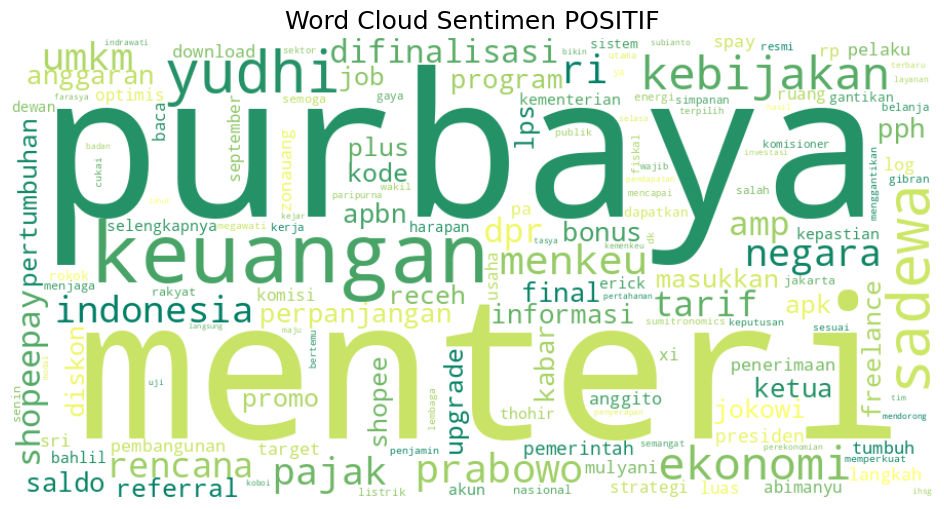

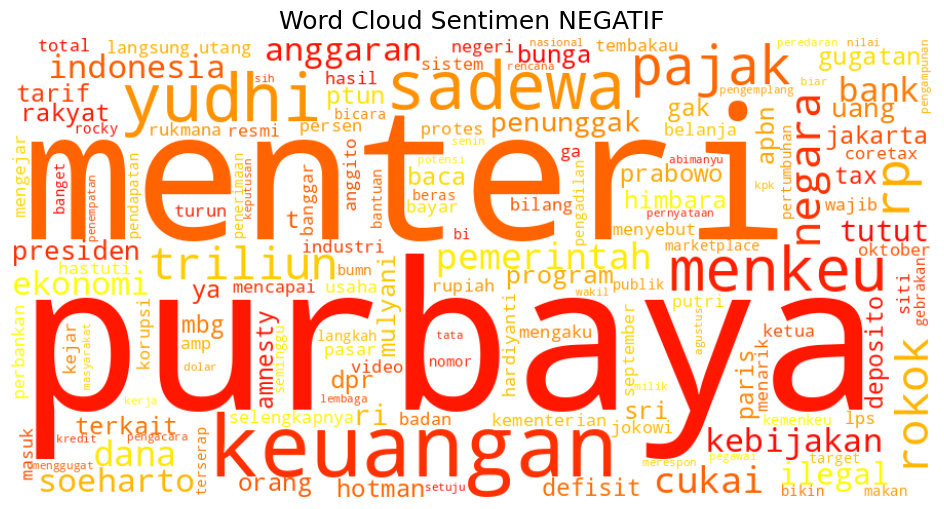

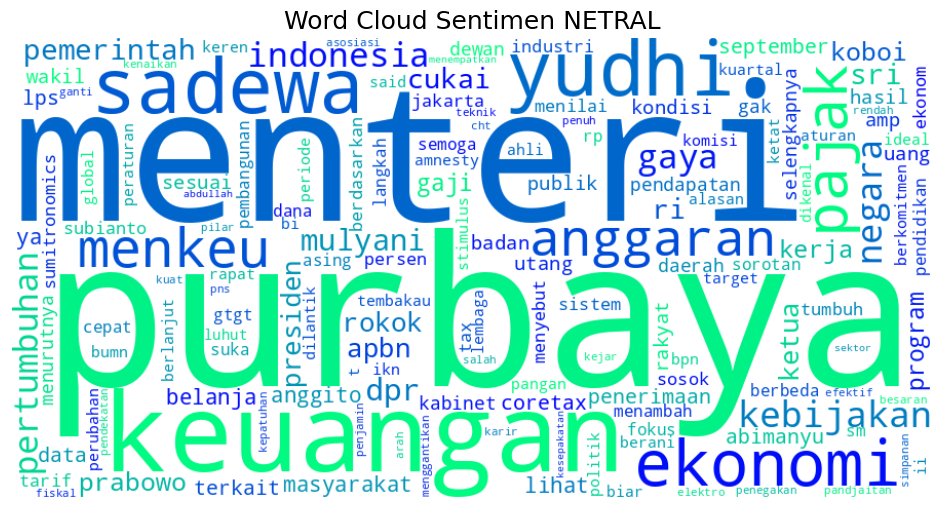


✅ WordCloud selesai dibuat.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# --- Path File ---
data_path = "/content/drive/MyDrive/sentiment_after_stopword_removal.csv"

# --- Load Data ---
df = pd.read_csv(data_path)
print(f"Data dimuat. Jumlah baris: {len(df)}")

# --- Validasi Kolom ---
required_cols = ['text_for_viz_topic', 'sentiment_category']
missing_cols = [col for col in required_cols if col not in df.columns]

if missing_cols:
    raise ValueError(f"Kolom berikut tidak ditemukan di CSV: {missing_cols}")

# --- Buang teks kosong ---
df['text_for_viz_topic'] = df['text_for_viz_topic'].fillna("").astype(str)
df = df[df['text_for_viz_topic'].str.strip() != ""]

print(f"Data setelah buang teks kosong: {len(df)}")

# --- Fungsi WordCloud ---
def create_wordcloud_by_sentiment(df, sentiment_label, colormap):
    text_data = df[df['sentiment_category'] == sentiment_label]['text_for_viz_topic']

    if text_data.empty:
        print(f"Peringatan: Tidak ada data untuk sentimen {sentiment_label}")
        return

    long_text = " ".join(text_data)

    wordcloud = WordCloud(
        background_color="white",
        width=900,
        height=450,
        max_words=150,
        colormap=colormap,
        collocations=False
    ).generate(long_text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud Sentimen {sentiment_label.upper()}", fontsize=18)
    plt.show()

# --- WordCloud per Sentimen ---
print("\nMembuat WordCloud...")

create_wordcloud_by_sentiment(df, "positif", colormap="summer")
create_wordcloud_by_sentiment(df, "negatif", colormap="autumn")
create_wordcloud_by_sentiment(df, "netral", colormap="winter")

print("\n✅ WordCloud selesai dibuat.")


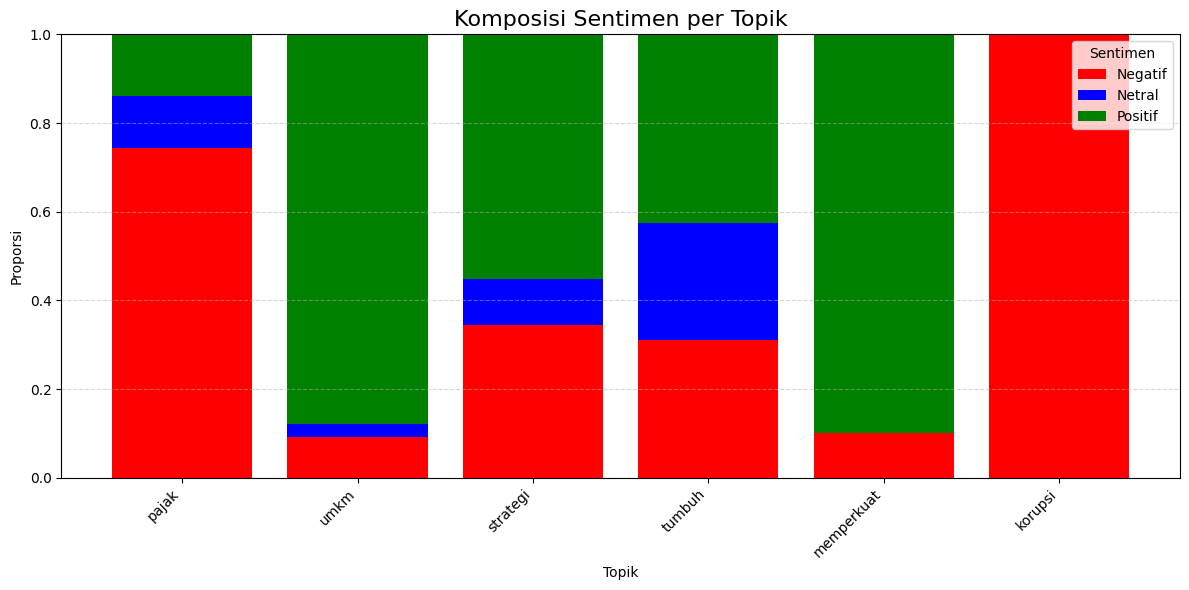

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load data
# -----------------------------
data_path = "/content/drive/MyDrive/sentiment_after_stopword_removal.csv"
df = pd.read_csv(data_path)

df['sentiment'] = df['sentiment_category'].str.lower().str.strip()

# -----------------------------
# 2. Topik dari WordCloud
# -----------------------------
keywords = ['pajak', 'umkm', 'strategi', 'tumbuh', 'memperkuat', 'korupsi']

data = []

for kw in keywords:
    subset = df[df['text_for_viz_topic'].str.contains(kw, case=False, na=False)]

    if len(subset) == 0:
        continue

    total = len(subset)

    neg = (subset['sentiment'] == 'negatif').sum() / total
    net = (subset['sentiment'] == 'netral').sum() / total
    pos = (subset['sentiment'] == 'positif').sum() / total

    data.append([kw, neg, net, pos])

df_plot = pd.DataFrame(
    data,
    columns=['topik', 'negatif', 'netral', 'positif']
)

# -----------------------------
# 3. Stacked bar plot
# -----------------------------
plt.figure(figsize=(12, 6))

plt.bar(df_plot['topik'], df_plot['negatif'], color='red', label='Negatif')
plt.bar(
    df_plot['topik'],
    df_plot['netral'],
    bottom=df_plot['negatif'],
    color='blue',
    label='Netral'
)
plt.bar(
    df_plot['topik'],
    df_plot['positif'],
    bottom=df_plot['negatif'] + df_plot['netral'],
    color='green',
    label='Positif'
)

# -----------------------------
# 4. Label & style
# -----------------------------
plt.title('Komposisi Sentimen per Topik', fontsize=16)
plt.ylabel('Proporsi')
plt.xlabel('Topik')
plt.ylim(0, 1)

plt.legend(title='Sentimen')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
